In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import OneHotEncoder
import time

import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [120]:
# for col in df.select_dtypes(include=['object']).columns:
#     df[col] = df[col].astype('category')

# cat_features = ['Cloud Cover','Season','Location']


In [150]:
# y = df['Weather Type']
# X = df.drop(columns=['Weather Type'])

# le = LabelEncoder()
# y_encoded = le.fit_transform(y)

# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42)

In [152]:
# X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Temperature           13200 non-null  float64 
 1   Humidity              13200 non-null  int64   
 2   Wind Speed            13200 non-null  float64 
 3   Precipitation (%)     13200 non-null  float64 
 4   Cloud Cover           13200 non-null  category
 5   Atmospheric Pressure  13200 non-null  float64 
 6   UV Index              13200 non-null  int64   
 7   Season                13200 non-null  category
 8   Visibility (km)       13200 non-null  float64 
 9   Location              13200 non-null  category
dtypes: category(3), float64(5), int64(2)
memory usage: 761.2 KB


In [156]:
# y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 13200 entries, 0 to 13199
Series name: Weather Type
Non-Null Count  Dtype   
--------------  -----   
13200 non-null  category
dtypes: category(1)
memory usage: 13.2 KB


In [158]:
# unique_labels = np.unique(y_encoded)
# print("Unique encoded labels:", unique_labels)

# print("Label mapping:")
# for index, label in enumerate(le.classes_):
#     print(f"{index} -> {label}")

Unique encoded labels: [0 1 2 3]
Label mapping:
0 -> Cloudy
1 -> Rainy
2 -> Snowy
3 -> Sunny


In [160]:
# X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10560 entries, 3958 to 7270
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Temperature           10560 non-null  float64 
 1   Humidity              10560 non-null  int64   
 2   Wind Speed            10560 non-null  float64 
 3   Precipitation (%)     10560 non-null  float64 
 4   Cloud Cover           10560 non-null  category
 5   Atmospheric Pressure  10560 non-null  float64 
 6   UV Index              10560 non-null  int64   
 7   Season                10560 non-null  category
 8   Visibility (km)       10560 non-null  float64 
 9   Location              10560 non-null  category
dtypes: category(3), float64(5), int64(2)
memory usage: 691.5 KB


In [164]:
# y_train.info()

In [167]:
# # Supported tree methods are `approx` and `hist`.
# xgb_clf = xgb.XGBClassifier(tree_method="hist", enable_categorical=True)
# # X is the dataframe we created in previous snippet
# xgb_clf.fit(X_train, y_train)
# #Not support Categorical Label
# #ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got ['Cloudy' 'Rainy' 'Snowy' 'Sunny']

# lgb_clf = lgb.LGBMClassifier()
# lgb_clf.fit(X_train,y_train)

# cb_clf = cb.CatBoostClassifier(verbose=False,cat_features=cat_features)
# cb_clf.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 10560, number of used features: 10
[LightGBM] [Info] Start training from score -1.382891
[LightGBM] [Info] Start training from score -1.381382
[LightGBM] [Info] Start training from score -1.401947
[LightGBM] [Info] Start training from score -1.379123


In [168]:
# y_pred = xgb_clf.predict(X_test)
# report = classification_report(y_test, y_pred)
# print(report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       651
           1       0.90      0.91      0.91       647
           2       0.93      0.95      0.94       701
           3       0.94      0.90      0.92       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



In [181]:
# y_pred = lgb_clf.predict(X_test)
# report = classification_report(y_test, y_pred)
# print(report)

# # Prediksi probabilitas pada test set
# y_pred_proba = lgb_clf.predict_proba(X_test)

# # Menghitung ROC AUC untuk setiap kelas
# n_classes = len(np.unique(y_test))
# roc_auc_per_class = {}

# for i in range(n_classes):
#     y_test_binary = (y_test == i).astype(int)
#     y_pred_proba_class = y_pred_proba[:, i]
#     roc_auc_per_class[i] = roc_auc_score(y_test_binary, y_pred_proba_class)

# # Mencetak ROC AUC untuk setiap kelas
# for cls, auc in roc_auc_per_class.items():
#     print(f"ROC AUC untuk kelas {le.inverse_transform([cls])[0]}: {auc:.4f}")

# # Menghitung ROC AUC OvR keseluruhan
# roc_auc_overall = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
# print(f"ROC AUC OvR keseluruhan: {roc_auc_overall:.4f}")

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       651
           1       0.91      0.90      0.91       647
           2       0.92      0.95      0.94       701
           3       0.92      0.90      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640

ROC AUC untuk kelas Cloudy: 0.9901
ROC AUC untuk kelas Rainy: 0.9921
ROC AUC untuk kelas Snowy: 0.9964
ROC AUC untuk kelas Sunny: 0.9940
ROC AUC OvR keseluruhan: 0.9931


In [170]:
# y_pred = cb_clf.predict(X_test)
# report = classification_report(y_test, y_pred)
# print(report)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       651
           1       0.90      0.91      0.91       647
           2       0.93      0.94      0.94       701
           3       0.93      0.90      0.92       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



# Data Collection
Source : https://research.unsw.edu.au/projects/unsw-nb15-dataset

In [8]:
df1 = pd.read_csv('data-train-1.csv')
df2 = pd.read_csv('data-train-2.csv')

df_train = pd.concat([df1, df2], ignore_index=True)
df_test = pd.read_csv('data-test.csv')

df_train.to_csv('data-train-full.csv', index=False)

# Data Processing

## Drop ['id','label'] and LabelEncoding

In [9]:
df_train.drop(columns=['id','label'],inplace=True)
df_test.drop(columns=['id','label'],inplace=True)

In [30]:
combined_df = pd.concat([df_train, df_test], ignore_index=True)

le = LabelEncoder()
# Encode labels in column 'attack_cat'. 
combined_df['attack']= le.fit_transform(combined_df['attack_cat']) 

n_train = len(df_train) 

df_train = combined_df.iloc[:n_train].reset_index(drop=True)
df_test  = combined_df.iloc[n_train:].reset_index(drop=True)

X_train = df_train.drop(columns=['attack_cat'])  
y_train = df_train['attack']  
X_test = df_test.drop(columns=['attack_cat']) 
y_test = df_test['attack'] 

print("Training set shape:", df_train.shape)
print("Test set shape:", df_test.shape)

Training set shape: (175341, 44)
Test set shape: (82332, 44)


In [32]:
unique_labels = np.unique(df_train['attack_cat'])
print("Unique encoded labels:", unique_labels)

print("Label mapping:")
for index, label in enumerate(le.classes_):
    print(f"{index} -> {label}")

Unique encoded labels: ['Analysis' 'Backdoor' 'DoS' 'Exploits' 'Fuzzers' 'Generic' 'Normal'
 'Reconnaissance' 'Shellcode' 'Worms']
Label mapping:
0 -> Analysis
1 -> Backdoor
2 -> DoS
3 -> Exploits
4 -> Fuzzers
5 -> Generic
6 -> Normal
7 -> Reconnaissance
8 -> Shellcode
9 -> Worms


In [18]:
def perform_rfe_cv(X, y, n_features_to_select=None):
    categorical_features = X.select_dtypes(include=['object', 'category']).columns
    numeric_features = X.select_dtypes(include=['int64', 'float64'])
    model = lgb.LGBMClassifier(data_sample_strategy='goss')
    rfe = RFE(model, n_features_to_select=n_features_to_select)
    rfe.fit(numeric_features, y)
    selected_numeric_features = X.columns[rfe.support_]
    selected_features = list(selected_numeric_features) + list(categorical_features)
    return selected_features

In [20]:
def apply_adasyn(X, y , n_minority_to_upsample = 1):
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    X_encoded = encoder.fit_transform(X[categorical_cols])
    X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))
    X_combined = pd.concat([X.drop(columns=categorical_cols).reset_index(drop=True), X_encoded_df], axis=1)
    current_X, current_y = X_combined, y
    for i in range(n_minority_to_upsample):
        adasyn = ADASYN(sampling_strategy='minority')
        X_resampled, y_resampled = adasyn.fit_resample(current_X, current_y)    
    X_resampled_df = pd.DataFrame(X_resampled, columns=X_combined.columns)
    original_categorical_df = encoder.inverse_transform(X_resampled_df[encoder.get_feature_names_out(categorical_cols)])
    original_categorical_df = pd.DataFrame(original_categorical_df, columns=categorical_cols)
    final_X = pd.concat([X_resampled_df.drop(columns=encoder.get_feature_names_out(categorical_cols)), original_categorical_df], axis=1)
    
    return final_X, y_resampled
 

In [193]:
def compute_class_weights(y):
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
    class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y), class_weights)}
    return class_weights_dict

In [ ]:
def run_scenario(scenario, X_train, y_train, X_test, y_test):
    selected_features = X_train.columns
    if 'RFE-CV' in scenario:
        selected_features = perform_rfe_cv(X_train, y_train)
        X_train = X_train[selected_features]
        X_test = X_test[selected_features]

    if 'ADASYN' in scenario:
        X_train, y_train = apply_adasyn(X_train, y_train)

    class_weights = None
    if 'CLASS WEIGHT' in scenario:
        class_weights = compute_class_weights(y_train)
        sample_weights = np.array([class_weights_dict[cls] for cls in y_train]) #For XGBoost

    models = {
        'LightGBM': LGBMClassifier(class_weight=class_weights,data_sample_strategy='goss'),
        'XGBoost': XGBClassifier(sample_weight=sample_weights),  # Note: Class Weight not supported,sample weight is
        'CatBoost': CatBoostClassifier(class_weights=class_weights, verbose=0)
    }

    results = {}
    
    for model_name, model in models.items():
        start_time = time.time()
        model.fit(X_train, y_train)
        fitting_time = time.time() - start_time
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)

        report = classification_report(y_test, y_pred, output_dict=True)
        # Calculate ROC AUC for each class
        n_classes = len(np.unique(y_test))
        roc_auc_per_class = {}
        for i in range(n_classes):
            y_test_binary = (y_test == i).astype(int)
            y_pred_proba_class = y_pred_proba[:, i]
            roc_auc_per_class[i] = roc_auc_score(y_test_binary, y_pred_proba_class)
        # Calculate overall ROC AUC (OvR)
        roc_auc_overall = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        # Store results
        results[model_name] = {
            'classification_report': report,
            'roc_auc_per_class': roc_auc_per_class,
            'roc_auc_overall': roc_auc_overall,
            'fitting_time': fitting_time
            # # Menghitung ROC AUC untuk setiap kelas

    return results

In [ ]:
scenarios = [
    [],
    ['RFE-CV'],
    ['ADASYN'],
    ['CLASS WEIGHT'],
    ['RFE-CV', 'ADASYN'],
    ['RFE-CV', 'CLASS WEIGHT'],
    ['ADASYN', 'CLASS WEIGHT'],
    ['RFE-CV', 'ADASYN', 'CLASS WEIGHT']
]

n_minority_to_upsample = 4 

all_results = {}
for idx, scenario in enumerate(scenarios, start=1):
    scenario_name = " + ".join(scenario) if scenario else "NO RFE-CV, ADASYN, CLASS WEIGHT"
    print(f"Running Scenario {idx}: {scenario_name}")
    results = run_scenario(scenario, X_train, y_train, X_test, y_test, n_minority_to_upsample=n_minority_to_upsample)
    all_results[scenario_name] = results

# Display results
for scenario_name, results in all_results.items():
    print(f"\nScenario: {scenario_name}")
    for model_name, report in results.items():
        print(f"\nModel: {model_name}")
        print(pd.DataFrame(report).transpose())


In [42]:
#Oversampling Using ADASYN
X_ada,y_ada = apply_adasyn(X_train,y_train,4)
#RFE-CV



## RFE-CV (Find Optimal Numeric Features)
Text data or categorical feature is not supported by RFE-CV,So the categorical feature will not be included and the output will be Optimal Numeric Features,The categorical will be used on model trainning.

In [56]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  object 
 2   service            175341 non-null  object 
 3   state              175341 non-null  object 
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  int64  
 10  dttl               175341 non-null  int64  
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  int64  
 14  dloss              175341 non-null  int64  
 15  sinpkt             175341 non-null  float64
 16  di

In [58]:
min_features_to_select = 10  # Minimum number of features to consider
clf = RandomForestClassifier()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)

X = df_train_encoded.drop(columns=['attack_cat','proto','service','state'])
y = df_train_encoded['attack_cat']
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 15


In [60]:
# Get the selected features
selected_features = X.columns[rfecv.support_]

# Print the selected features
print("Selected features:")
print(selected_features)

Selected features:
Index(['sbytes', 'dbytes', 'rate', 'sttl', 'sload', 'dload', 'tcprtt', 'smean',
       'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_srv_dst'],
      dtype='object')


## ADASYN 

### Class Count Before ADASYN 

In [85]:
df_train_encoded.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,6
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,6
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,6
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,6
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,6


In [87]:
attack_cat_frequency = df_train_encoded['attack_cat'].value_counts()
print(attack_cat_frequency)

attack_cat
6    56000
5    40000
3    33393
4    18184
2    12264
7    10491
0     2000
1     1746
8     1133
9      130
Name: count, dtype: int64


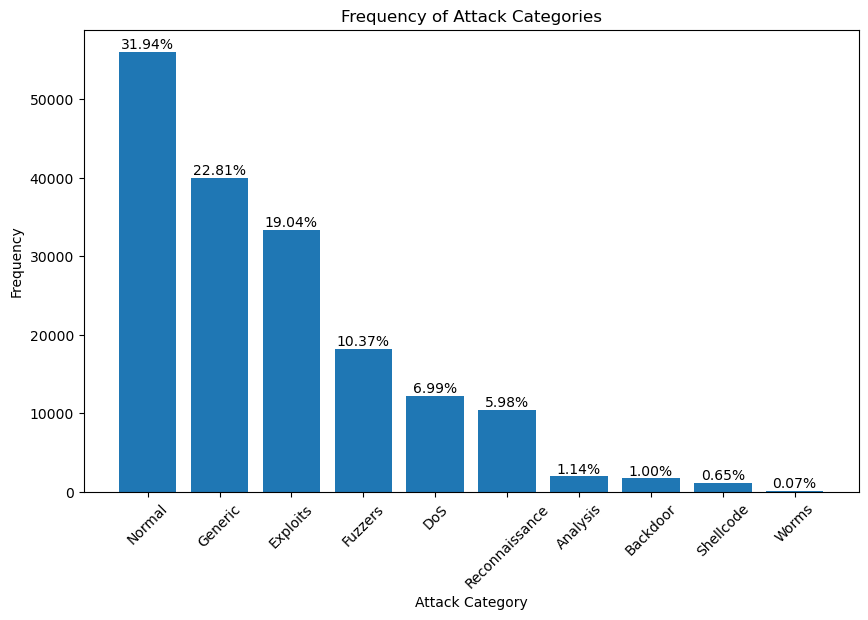

In [91]:
# Calculate the frequency of each encoded category in the 'attack_cat' column
attack_cat_frequency = df_train_encoded['attack_cat'].value_counts()

# Map the encoded values back to their original categories
attack_cat_frequency.index = le.inverse_transform(attack_cat_frequency.index)

# Calculate the percentage of each category
attack_cat_percentage = (attack_cat_frequency / attack_cat_frequency.sum()) * 100

# Plot the frequency
plt.figure(figsize=(10, 6))
bars = plt.bar(attack_cat_frequency.index, attack_cat_frequency.values)

# Add percentage labels on top of the bars
for bar, percentage in zip(bars, attack_cat_percentage):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Frequency of Attack Categories')
plt.xlabel('Attack Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Class Count After ADASYN 

In [139]:
# Assuming df_train_encoded is already defined and contains the features and target
# Separate features and target
X = df_train_encoded.drop(columns=['attack_cat','proto','service','state'], axis=1)
y = df_train_encoded['attack_cat']

# Loop to apply ADASYN multiple times
for i in range(4):
    adasyn = ADASYN(sampling_strategy='minority')
    X_resampled, y_resampled = adasyn.fit_resample(X, y)
    X = pd.DataFrame(X_resampled, columns=X.columns)
    y = y_resampled

# Convert resampled data back to DataFrame
df_train_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_train_resampled['attack_cat'] = y_resampled

# Display the resampled DataFrame
print(df_train_resampled['attack_cat'].value_counts())

attack_cat
1    56358
9    56022
6    56000
0    55975
8    55836
5    40000
3    33393
4    18184
2    12264
7    10491
Name: count, dtype: int64


## Compute Class Weight (On Normal and Oversampled Data)

# Model Trainning

## Scenario 1 (No RFE-CV,ADASYN,Class Weight)

In [154]:
X_train = df_train_encoded.drop(columns=['attack_cat','proto','service','state'], axis=1)
y_train = df_train_encoded['attack_cat']

X_test = df_test_encoded.drop(columns=['attack_cat','proto','service','state'], axis=1)
y_test = df_test_encoded['attack_cat']

In [156]:
lgb_clf = lgb.LGBMClassifier(data_sample_strategy='goss')
lgb_clf.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5981
[LightGBM] [Info] Number of data points in the train set: 175341, number of used features: 39
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score -4.473585
[LightGBM] [Info] Start training from score -4.609405
[LightGBM] [Info] Start training from score -2.660065
[LightGBM] [Info] Start training from score -1.658386
[LightGBM] [Info] Start training from score -2.266191
[LightGBM] [Info] Start training from score -1.477853
[LightGBM] [Info] Start training from score -1.141381
[LightGBM] [Info] Start training from score -2.816215
[LightGBM] [Info] Start training from score -5.041864
[LightGBM] [Info] Start training from score -7.206953


LGBMClassifier(data_sample_strategy='goss')

In [157]:
y_pred = lgb_clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.01      0.02      0.01       677
           1       0.02      0.05      0.03       583
           2       0.21      0.05      0.08      4089
           3       0.58      0.74      0.65     11132
           4       0.30      0.57      0.39      6062
           5       0.97      0.95      0.96     18871
           6       0.95      0.74      0.83     37000
           7       0.79      0.79      0.79      3496
           8       0.14      0.59      0.22       378
           9       0.00      0.00      0.00        44

    accuracy                           0.73     82332
   macro avg       0.40      0.45      0.40     82332
weighted avg       0.79      0.73      0.75     82332



## Scenario 2 (ADASYN)

In [159]:
X_train = df_train_resampled.drop(columns=['attack_cat'], axis=1)
y_train = df_train_resampled['attack_cat']

In [160]:
lgb_clf = lgb.LGBMClassifier(data_sample_strategy='goss')
lgb_clf.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6586
[LightGBM] [Info] Number of data points in the train set: 394523, number of used features: 39
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score -1.952772
[LightGBM] [Info] Start training from score -1.945953
[LightGBM] [Info] Start training from score -3.471009
[LightGBM] [Info] Start training from score -2.469331
[LightGBM] [Info] Start training from score -3.077135
[LightGBM] [Info] Start training from score -2.288798
[LightGBM] [Info] Start training from score -1.952326
[LightGBM] [Info] Start training from score -3.627160
[LightGBM] [Info] Start training from score -1.955259
[LightGBM] [Info] Start training from score -1.951933


LGBMClassifier(data_sample_strategy='goss')

In [161]:
y_pred = lgb_clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.05      0.50      0.10       677
           1       0.05      0.34      0.08       583
           2       0.36      0.07      0.12      4089
           3       0.76      0.59      0.66     11132
           4       0.31      0.54      0.39      6062
           5       0.98      0.86      0.92     18871
           6       0.92      0.72      0.81     37000
           7       0.88      0.78      0.83      3496
           8       0.13      0.91      0.23       378
           9       0.08      0.70      0.14        44

    accuracy                           0.69     82332
   macro avg       0.45      0.60      0.43     82332
weighted avg       0.82      0.69      0.74     82332



## Scenario 3 (Class Weight)

In [172]:
X_train = df_train_encoded.drop(columns=['attack_cat','proto','service','state'], axis=1)
y_train = df_train_encoded['attack_cat']

X_test = df_test_encoded.drop(columns=['attack_cat','proto','service','state'], axis=1)
y_test = df_test_encoded['attack_cat']

In [176]:
# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

print(class_weights_dict)

{0: 8.76705, 1: 10.042439862542956, 2: 1.4297211350293542, 3: 0.5250831012487647, 4: 0.9642597888253409, 5: 0.4383525, 6: 0.3131089285714286, 7: 1.6713468687446382, 8: 15.475816416593116, 9: 134.8776923076923}


In [178]:
lgb_clf = lgb.LGBMClassifier(data_sample_strategy='goss',class_weight=class_weights_dict)
lgb_clf.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5981
[LightGBM] [Info] Number of data points in the train set: 175341, number of used features: 39
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585


LGBMClassifier(class_weight={0: 8.76705, 1: 10.042439862542956,
                             2: 1.4297211350293542, 3: 0.5250831012487647,
                             4: 0.9642597888253409, 5: 0.4383525,
                             6: 0.3131089285714286, 7: 1.6713468687446382,
                             8: 15.475816416593116, 9: 134.8776923076923},
               data_sample_strategy='goss')

In [180]:
y_pred = lgb_clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.06      0.34      0.11       677
           1       0.04      0.41      0.08       583
           2       0.41      0.22      0.28      4089
           3       0.80      0.59      0.68     11132
           4       0.26      0.66      0.37      6062
           5       0.98      0.96      0.97     18871
           6       0.99      0.62      0.76     37000
           7       0.84      0.83      0.84      3496
           8       0.17      0.94      0.29       378
           9       0.21      0.80      0.33        44

    accuracy                           0.68     82332
   macro avg       0.48      0.64      0.47     82332
weighted avg       0.85      0.68      0.73     82332



## Scenario 4 (RFE-CV)

In [185]:
selected_features = [
    'sbytes', 'dbytes', 'rate', 'sttl', 'sload', 'dload', 'tcprtt', 'smean',
    'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_src_dport_ltm',
    'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_srv_dst'
]

# Separate features and target for training set
X_train = df_train_encoded[selected_features]
y_train = df_train_encoded['attack_cat']

# Separate features and target for test set
X_test = df_test_encoded[selected_features]
y_test = df_test_encoded['attack_cat']

lgb_clf = lgb.LGBMClassifier(data_sample_strategy='goss')
lgb_clf.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2294
[LightGBM] [Info] Number of data points in the train set: 175341, number of used features: 15
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score -4.473585
[LightGBM] [Info] Start training from score -4.609405
[LightGBM] [Info] Start training from score -2.660065
[LightGBM] [Info] Start training from score -1.658386
[LightGBM] [Info] Start training from score -2.266191
[LightGBM] [Info] Start training from score -1.477853
[LightGBM] [Info] Start training from score -1.141381
[LightGBM] [Info] Start training from score -2.816215
[LightGBM] [Info] Start training from score -5.041864
[LightGBM] [Info] Start training from score -7.206953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

LGBMClassifier(data_sample_strategy='goss')

In [187]:
y_pred = lgb_clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.02      0.04      0.03       677
           1       0.03      0.05      0.04       583
           2       0.30      0.13      0.18      4089
           3       0.57      0.68      0.62     11132
           4       0.30      0.56      0.39      6062
           5       0.90      0.93      0.92     18871
           6       0.94      0.71      0.81     37000
           7       0.52      0.79      0.63      3496
           8       0.15      0.46      0.22       378
           9       0.00      0.00      0.00        44

    accuracy                           0.71     82332
   macro avg       0.37      0.43      0.38     82332
weighted avg       0.77      0.71      0.72     82332



# Model Evaluation